# Neural networks

## Classifying movie reviews: A binary classification 

### Load the IMDB dataset

In [159]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [195]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [162]:
test_data

array([list([1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717]),
       list([1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 7216, 2, 4, 8463, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 2, 19, 861, 1074, 5, 1987, 2, 45, 55, 221, 15, 670, 5304, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 5045, 5304, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 8463, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 6936, 185, 132, 1988, 5304, 1799, 488, 2693, 47, 6, 392, 173, 4, 2, 4378, 270, 2352, 4, 1500, 7, 

In [163]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [164]:
test_labels

array([0, 1, 1, ..., 0, 0, 0])

In [165]:
max([max(length) for length in train_data])

9999

**Decoding reviews back to text**

In [166]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [198]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [168]:
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [169]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the data

In [170]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [171]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [172]:
x_train[1]

array([0., 1., 1., ..., 0., 0., 0.])

In [173]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [174]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

# Model 1-1 Hidden Layer(16 units)

In [175]:
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import tensorflow as tf
import random

# Set seed values for reproducibility
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)


# 1. Split the data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# 2. Define the model (1 hidden layer with 16 units and tanh activation)
model_1layer_16units = keras.Sequential([
    layers.Dense(16, activation="tanh", input_shape=(x_train.shape[1],)),
    layers.Dense(1, activation="sigmoid")
])

# 3. Compile the model with MSE loss and RMSprop optimizer
model_1layer_16units.compile(optimizer="rmsprop",
                     loss="mse",
                     metrics=["accuracy"])

# 4. Train the model with validation data
history_1layer = model_1layer_16units.fit(partial_x_train,
                                  partial_y_train,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(x_val, y_val))

# 5. Evaluate on test data
results_test = model_1layer_16units.evaluate(x_test, y_test)

# 6. Evaluate on validation data
results_val = model_1layer_16units.evaluate(x_val, y_val)

# 7. Print results
print("Test Results:(1-layer, 16 units each)", results_test)
print("Validation Results:(1-layer, 16 units each)", results_val)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.7898 - loss: 0.1733 - val_accuracy: 0.8559 - val_loss: 0.1326
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8885 - loss: 0.1102 - val_accuracy: 0.8761 - val_loss: 0.1074
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9115 - loss: 0.0866 - val_accuracy: 0.8828 - val_loss: 0.0966
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9250 - loss: 0.0730 - val_accuracy: 0.8855 - val_loss: 0.0906
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9338 - loss: 0.0639 - val_accuracy: 0.8832 - val_loss: 0.0887
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9382 - loss: 0.0575 - val_accuracy: 0.8845 - val_loss: 0.0860
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9473 - loss: 0.0515 - val_accuracy: 0.8849 - val_loss: 0.0843
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9517 - loss: 0.0473 - val_accuracy: 0.8845 - v

# Model 2 -3 Hidden Layers

In [176]:
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import tensorflow as tf
import random

# Set seed values for reproducibility
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)


# 1. Split the data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# 2. Define the model with 3 hidden layers, each having 16 units
model_3layer_16units = keras.Sequential([
    layers.Dense(16, activation="tanh", input_shape=(x_train.shape[1],)),
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")  # Output layer for binary classification
])

# 3. Compile the model
model_3layer_16units.compile(optimizer="rmsprop",
                             loss="mse",
                             metrics=["accuracy"])

# 4. Train the model
history_16units = model_3layer_16units.fit(partial_x_train,
                                           partial_y_train,
                                           epochs=20,
                                           batch_size=512,
                                           validation_data=(x_val, y_val))

# 5. Evaluate the model
results_test = model_3layer_16units.evaluate(x_test, y_test)
results_val = model_3layer_16units.evaluate(x_val, y_val)

# 6. Print results
print("Test Results (3-layer, 16 units each):", results_test)
print("Validation Results (3-layer, 16 units each):", results_val)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.7681 - loss: 0.1694 - val_accuracy: 0.8665 - val_loss: 0.1111
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8923 - loss: 0.0888 - val_accuracy: 0.8859 - val_loss: 0.0866
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9149 - loss: 0.0656 - val_accuracy: 0.8856 - val_loss: 0.0843
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9348 - loss: 0.0513 - val_accuracy: 0.8821 - val_loss: 0.0846
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9437 - loss: 0.0436 - val_accuracy: 0.8844 - val_loss: 0.0870
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9515 - loss: 0.0379 - val_accuracy: 0.8788 - val_loss: 0.0923
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9657 - loss: 0.0285 - val_accuracy: 0.8759 - val_loss: 0.0956
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9627 - loss: 0.0305 - val_accuracy: 0.8789 - v

In [177]:

import matplotlib.pyplot as plt
def plot_training_history(history, title_suffix=""):
    history_dict = history.history
    epochs = range(1, len(history_dict["loss"]) + 1)
    
    # Plot Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history_dict["loss"], "bo-", label="Training Loss")
    plt.plot(epochs, history_dict["val_loss"], "ro-", label="Validation Loss")
    plt.title(f"Training and Validation Loss {title_suffix}")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    
    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history_dict["accuracy"], "bo-", label="Training Accuracy")
    plt.plot(epochs, history_dict["val_accuracy"], "ro-", label="Validation Accuracy")
    plt.title(f"Training and Validation Accuracy {title_suffix}")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    
    plt.tight_layout()
    plt.show()


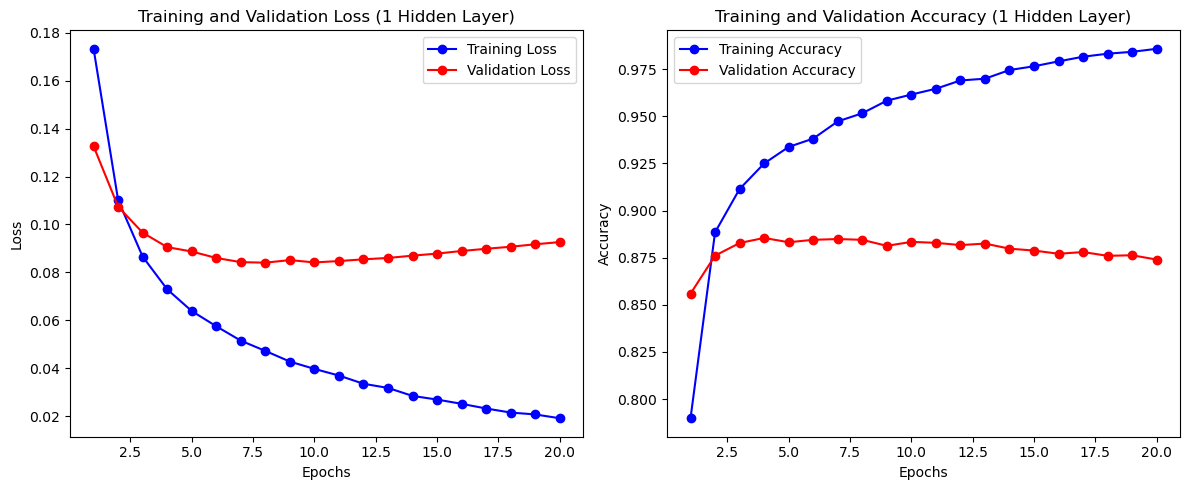

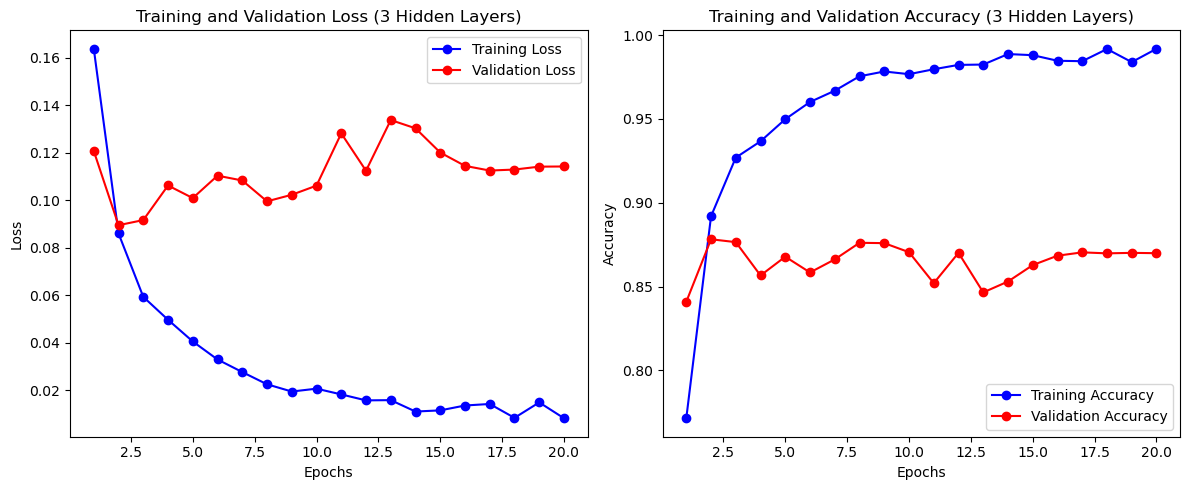

In [178]:
# For 1 hidden layer model
plot_training_history(history_1layer, title_suffix="(1 Hidden Layer)")


# For 3 hidden layers model
plot_training_history(history_3layers, title_suffix="(3 Hidden Layers)")


# Model 3-1 Hidden Layer(32)

In [179]:
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import tensorflow as tf
import random

# Set seed values for reproducibility
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)


# 1. Split the data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# 2. Define the model (1 hidden layer with 16 units and tanh activation)
model_1layer_32units = keras.Sequential([
    layers.Dense(32, activation="tanh", input_shape=(x_train.shape[1],)),
    layers.Dense(1, activation="sigmoid")
])

# 3. Compile the model with MSE loss and RMSprop optimizer
model_1layer_32units.compile(optimizer="rmsprop",
                     loss="mse",
                     metrics=["accuracy"])

# 4. Train the model with validation data
history_1layer = model_1layer_32units.fit(partial_x_train,
                                  partial_y_train,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(x_val, y_val))

# 5. Evaluate on test data
results_test = model_1layer_32units.evaluate(x_test, y_test)

# 6. Evaluate on validation data
results_val = model_1layer_32units.evaluate(x_val, y_val)

# 7. Print results
print("Test Results:(1-layer, 32 units each)", results_test)
print("Validation Results:(1-layer, 32 units each)", results_val)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.7825 - loss: 0.1694 - val_accuracy: 0.8670 - val_loss: 0.1234
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.8886 - loss: 0.1039 - val_accuracy: 0.8794 - val_loss: 0.0998
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9119 - loss: 0.0802 - val_accuracy: 0.8828 - val_loss: 0.0935
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9217 - loss: 0.0690 - val_accuracy: 0.8851 - val_loss: 0.0881
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9297 - loss: 0.0611 - val_accuracy: 0.8868 - val_loss: 0.0844
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9409 - loss: 0.0538 - val_accuracy: 0.8869 - val_loss: 0.0831
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9483 - loss: 0.0481 - val_accuracy: 0.8805 - val_loss: 0.0868
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9471 - loss: 0.0465 - val_accuracy: 0.8850 - v

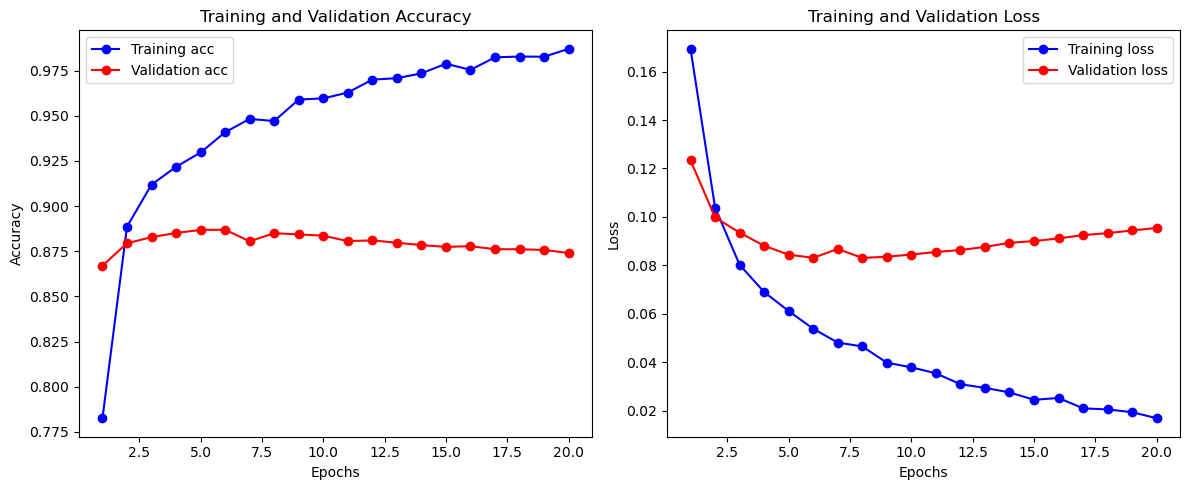

In [181]:
import matplotlib.pyplot as plt

# Extract data from history
acc = history_1layer.history['accuracy']
val_acc = history_1layer.history['val_accuracy']
loss = history_1layer.history['loss']
val_loss = history_1layer.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training acc')
plt.plot(epochs, val_acc, 'ro-', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Model 4:3 Hidden Layers(32units)

In [182]:
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import tensorflow as tf
import random

# Set seed values for reproducibility
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)


# 1. Split the data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# 2. Define the model with 3 hidden layers, each having 16 units
model_3layer_32units = keras.Sequential([
    layers.Dense(32, activation="tanh", input_shape=(x_train.shape[1],)),
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(1, activation="sigmoid")  # Output layer for binary classification
])

# 3. Compile the model
model_3layer_32units.compile(optimizer="rmsprop",
                             loss="mse",
                             metrics=["accuracy"])

# 4. Train the model
history_32units = model_3layer_32units.fit(partial_x_train,
                                           partial_y_train,
                                           epochs=20,
                                           batch_size=512,
                                           validation_data=(x_val, y_val))

# 5. Evaluate the model
results_test = model_3layer_32units.evaluate(x_test, y_test)
results_val = model_3layer_32units.evaluate(x_val, y_val)

# 6. Print results
print("Test Results (3-layer, 32 units each):", results_test)
print("Validation Results (3-layer, 32 units each):", results_val)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.7604 - loss: 0.1632 - val_accuracy: 0.8691 - val_loss: 0.1003
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8863 - loss: 0.0860 - val_accuracy: 0.8887 - val_loss: 0.0843
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9133 - loss: 0.0659 - val_accuracy: 0.8805 - val_loss: 0.0886
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9327 - loss: 0.0519 - val_accuracy: 0.8846 - val_loss: 0.0855
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9389 - loss: 0.0466 - val_accuracy: 0.8831 - val_loss: 0.0875
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9499 - loss: 0.0395 - val_accuracy: 0.8808 - val_loss: 0.0907
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9546 - loss: 0.0358 - val_accuracy: 0.8767 - val_loss: 0.0946
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9618 - loss: 0.0299 - val_accuracy: 0.8761 - v

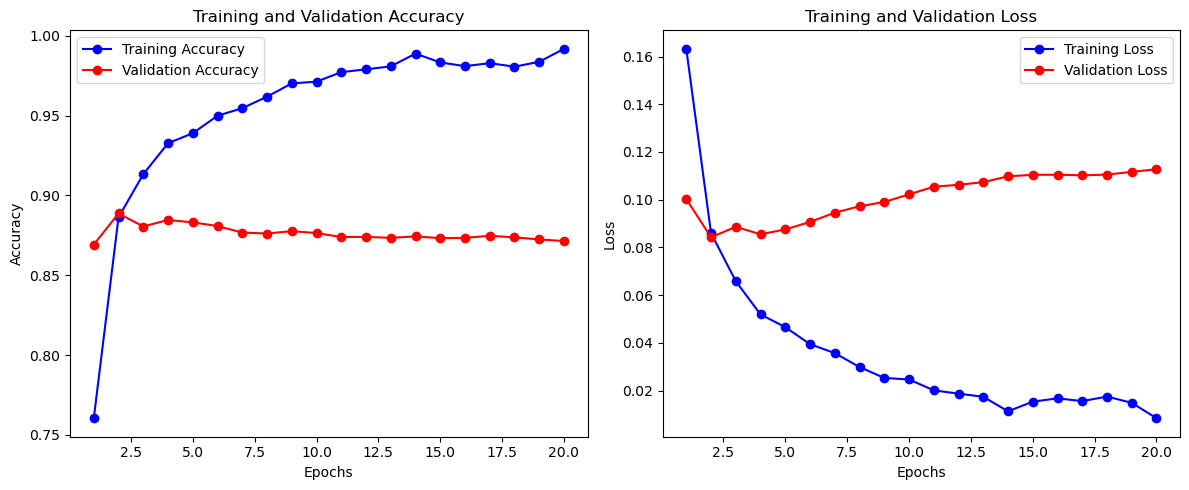

In [183]:
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf
import random

# Set seed values for reproducibility
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)


# Extract metrics from history
acc = history_32units.history['accuracy']
val_acc = history_32units.history['val_accuracy']
loss = history_32units.history['loss']
val_loss = history_32units.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Model 1A

In [201]:
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import numpy as np
import tensorflow as tf
import random

# Set seed values for reproducibility
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

# 1. Split the data (assuming x_train and y_train are already loaded)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# 2. Define the model with regularization and dropout
model_1layer_16units = keras.Sequential([
    layers.Dense(16,
                 activation="tanh",
                 kernel_regularizer=regularizers.l2(0.001),
                 input_shape=(x_train.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

# 3. Compile the model
model_1layer_16units.compile(optimizer="rmsprop",
                             loss="mse",
                             metrics=["accuracy"])

# 4. Train the model with validation data
history_1layer = model_1layer_16units.fit(partial_x_train,
                                          partial_y_train,
                                          epochs=20,
                                          batch_size=512,
                                          validation_data=(x_val, y_val))

# 5. Evaluate on test data
results_test = model_1layer_16units.evaluate(x_test, y_test)

# 6. Evaluate on validation data
results_val = model_1layer_16units.evaluate(x_val, y_val)

# 7. Print results
print("Test Results (1-layer, 16 units, L2 + Dropout):", results_test)
print("Validation Results (1-layer, 16 units, L2 + Dropout):", results_val)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 151ms/step - accuracy: 0.7729 - loss: 0.2080 - val_accuracy: 0.8516 - val_loss: 0.1646
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8825 - loss: 0.1456 - val_accuracy: 0.8742 - val_loss: 0.1362
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8988 - loss: 0.1231 - val_accuracy: 0.8783 - val_loss: 0.1250
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9100 - loss: 0.1099 - val_accuracy: 0.8839 - val_loss: 0.1171
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9199 - loss: 0.1009 - val_accuracy: 0.8842 - val_loss: 0.1141
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9252 - loss: 0.0953 - val_accuracy: 0.8835 - val_loss: 0.1120
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9300 - loss: 0.0907 - val_accuracy: 0.8848 - val_loss: 0.1102
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9341 - loss: 0.0866 - val_accuracy: 0.8801 - 

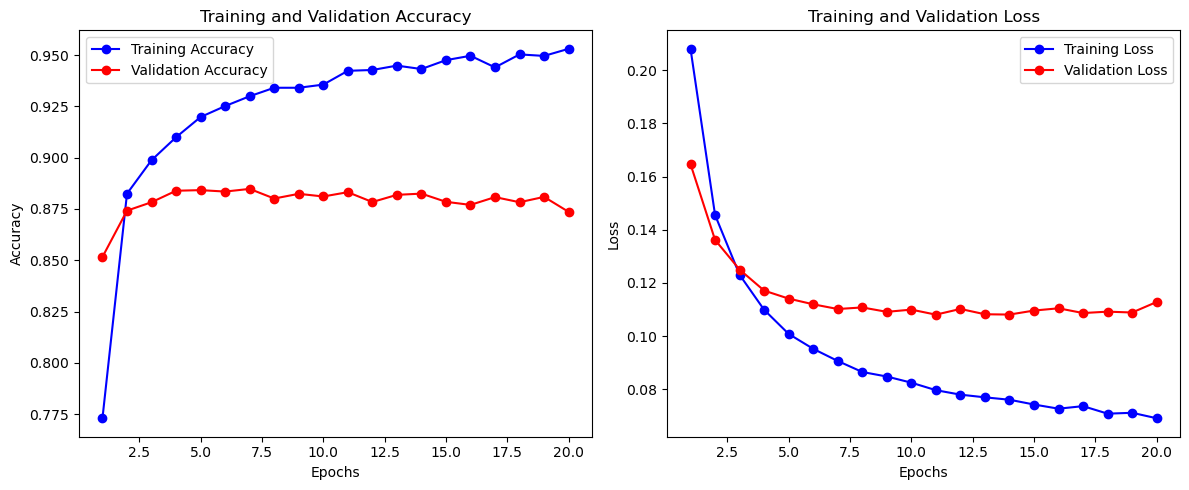

In [203]:
import matplotlib.pyplot as plt

# Extract data from training history
acc = history_1layer.history['accuracy']
val_acc = history_1layer.history['val_accuracy']
loss = history_1layer.history['loss']
val_loss = history_1layer.history['val_loss']
epochs = range(1, len(acc) + 1)

# Create subplots
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Model 1B

In [204]:
from tensorflow import keras
from tensorflow.keras import layers, regularizers

import numpy as np
import tensorflow as tf
import random

# Set seed values for reproducibility
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

# 1. Split the data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# 2. Define the model with L2 regularization and Dropout
model_3layer_16units = keras.Sequential([
    layers.Dense(16, activation="tanh",
                 kernel_regularizer=regularizers.l2(0.001),
                 input_shape=(x_train.shape[1],)),
    layers.Dropout(0.5),

    layers.Dense(16, activation="tanh",
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),

    layers.Dense(16, activation="tanh",
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),

    layers.Dense(1, activation="sigmoid")  # Output layer for binary classification
])

# 3. Compile the model with MSE loss
model_3layer_16units.compile(optimizer="rmsprop",
                             loss="mse",
                             metrics=["accuracy"])

# 4. Train the model
history_16units = model_3layer_16units.fit(partial_x_train,
                                           partial_y_train,
                                           epochs=20,
                                           batch_size=512,
                                           validation_data=(x_val, y_val))

# 5. Evaluate the model
results_test = model_3layer_16units.evaluate(x_test, y_test)
results_val = model_3layer_16units.evaluate(x_val, y_val)

# 6. Print results
print("Test Results (3-layer, 16 units each, MSE + L2 + Dropout):", results_test)
print("Validation Results (3-layer, 16 units each, MSE + L2 + Dropout):", results_val)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.6829 - loss: 0.2627 - val_accuracy: 0.8552 - val_loss: 0.1875
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8260 - loss: 0.1921 - val_accuracy: 0.8760 - val_loss: 0.1488
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8729 - loss: 0.1566 - val_accuracy: 0.8741 - val_loss: 0.1415
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9003 - loss: 0.1344 - val_accuracy: 0.8829 - val_loss: 0.1331
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9177 - loss: 0.1195 - val_accuracy: 0.8819 - val_loss: 0.1332
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9250 - loss: 0.1088 - val_accuracy: 0.8830 - val_loss: 0.1300
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9325 - loss: 0.1008 - val_accuracy: 0.8849 - val_loss: 0.1294
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9374 - loss: 0.0934 - val_accuracy: 0.8792 - v

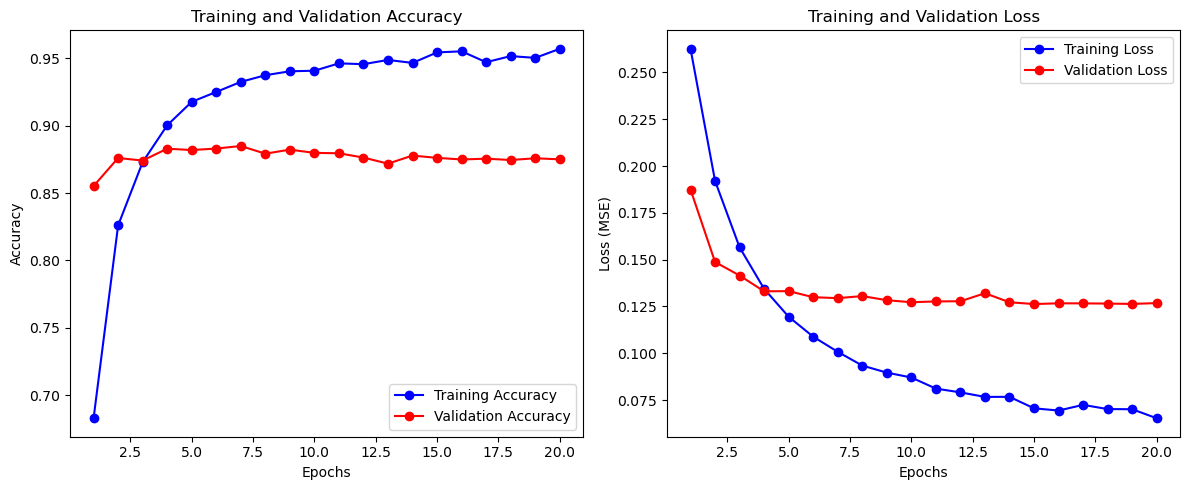

In [205]:
import matplotlib.pyplot as plt

# Extract training history
acc = history_16units.history['accuracy']
val_acc = history_16units.history['val_accuracy']
loss = history_16units.history['loss']
val_loss = history_16units.history['val_loss']
epochs = range(1, len(acc) + 1)

# Set up the figure
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()

plt.tight_layout()
plt.show()


# Model 5:1 Hidden Layer(64 units)

In [184]:
from tensorflow import keras
from tensorflow.keras import layers


import numpy as np
import tensorflow as tf
import random

# Set seed values for reproducibility
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)


# 1. Split the data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# 2. Define the model (1 hidden layer with 16 units and tanh activation)
model_1layer_64units = keras.Sequential([
    layers.Dense(64, activation="tanh", input_shape=(x_train.shape[1],)),
    layers.Dense(1, activation="sigmoid")
])

# 3. Compile the model with MSE loss and RMSprop optimizer
model_1layer_64units.compile(optimizer="rmsprop",
                     loss="mse",
                     metrics=["accuracy"])

# 4. Train the model with validation data
history_1layer = model_1layer_64units.fit(partial_x_train,
                                  partial_y_train,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(x_val, y_val))

# 5. Evaluate on test data
results_test = model_1layer_64units.evaluate(x_test, y_test)

# 6. Evaluate on validation data
results_val = model_1layer_64units.evaluate(x_val, y_val)

# 7. Print results
print("Test Results:(1-layer, 64 units each)", results_test)
print("Validation Results:(1-layer, 64 units each)", results_val)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.7699 - loss: 0.1646 - val_accuracy: 0.8590 - val_loss: 0.1172
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8804 - loss: 0.0992 - val_accuracy: 0.8705 - val_loss: 0.0999
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9077 - loss: 0.0775 - val_accuracy: 0.8824 - val_loss: 0.0898
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9190 - loss: 0.0678 - val_accuracy: 0.8874 - val_loss: 0.0843
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9272 - loss: 0.0594 - val_accuracy: 0.8780 - val_loss: 0.0897
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9355 - loss: 0.0539 - val_accuracy: 0.8864 - val_loss: 0.0833
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9372 - loss: 0.0506 - val_accuracy: 0.8870 - val_loss: 0.0831
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9491 - loss: 0.0437 - val_accuracy: 0.8806 - v

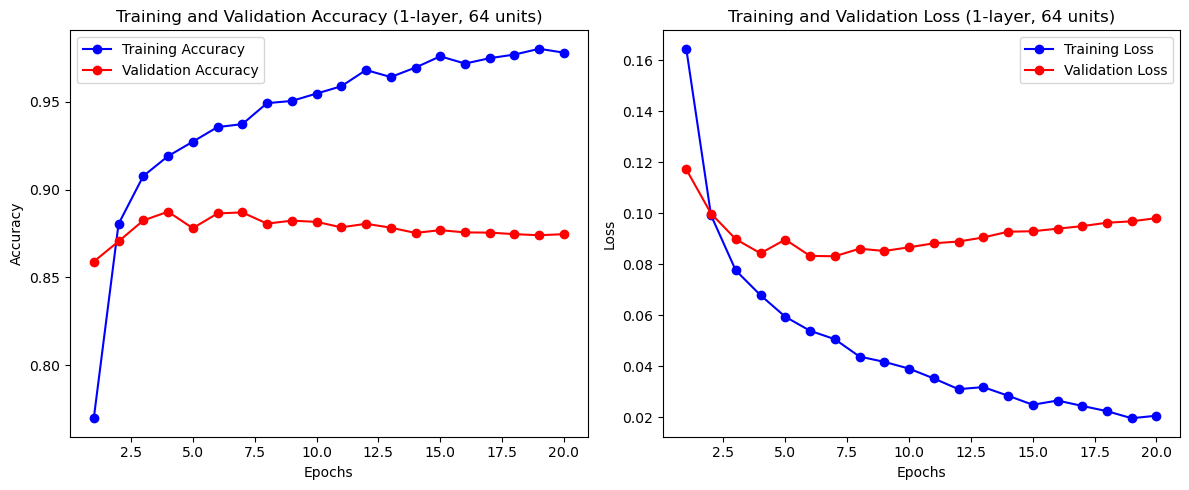

In [185]:
import matplotlib.pyplot as plt

# Extract metrics from history
acc = history_1layer.history['accuracy']
val_acc = history_1layer.history['val_accuracy']
loss = history_1layer.history['loss']
val_loss = history_1layer.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy (1-layer, 64 units)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss (1-layer, 64 units)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Model 6:3 Hidden Layers(64units)

In [186]:
from tensorflow import keras
from tensorflow.keras import layers


import numpy as np
import tensorflow as tf
import random

# Set seed values for reproducibility
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)


# 1. Split the data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# 2. Define the model with 3 hidden layers, each having 16 units
model_3layer_64units = keras.Sequential([
    layers.Dense(64, activation="tanh", input_shape=(x_train.shape[1],)),
    layers.Dense(64, activation="tanh"),
    layers.Dense(64, activation="tanh"),
    layers.Dense(1, activation="sigmoid")  # Output layer for binary classification
])

# 3. Compile the model
model_3layer_64units.compile(optimizer="rmsprop",
                             loss="mse",
                             metrics=["accuracy"])

# 4. Train the model
history_64units = model_3layer_64units.fit(partial_x_train,
                                           partial_y_train,
                                           epochs=20,
                                           batch_size=512,
                                           validation_data=(x_val, y_val))

# 5. Evaluate the model
results_test = model_3layer_64units.evaluate(x_test, y_test)
results_val = model_3layer_64units.evaluate(x_val, y_val)

# 6. Print results
print("Test Results (3-layer, 64 units each):", results_test)
print("Validation Results (3-layer, 64 units each):", results_val)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.7614 - loss: 0.1666 - val_accuracy: 0.8681 - val_loss: 0.0969
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8774 - loss: 0.0910 - val_accuracy: 0.8803 - val_loss: 0.0867
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9036 - loss: 0.0708 - val_accuracy: 0.8708 - val_loss: 0.0951
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9232 - loss: 0.0585 - val_accuracy: 0.8836 - val_loss: 0.0851
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9334 - loss: 0.0507 - val_accuracy: 0.8854 - val_loss: 0.0861
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9439 - loss: 0.0436 - val_accuracy: 0.8829 - val_loss: 0.0892
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9500 - loss: 0.0392 - val_accuracy: 0.8793 - val_loss: 0.0931
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9652 - loss: 0.0299 - val_accuracy: 0.8788 - v

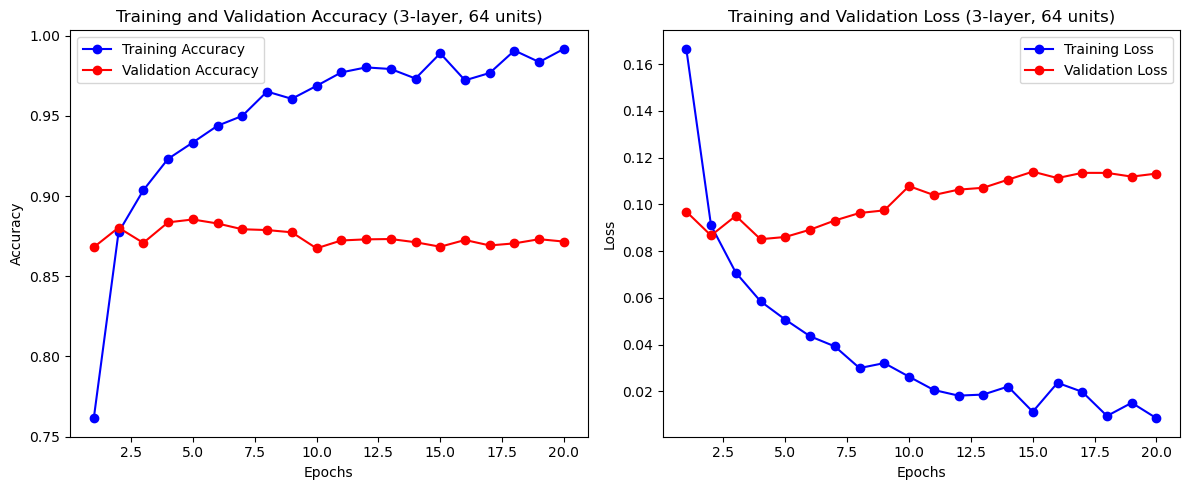

In [187]:
import matplotlib.pyplot as plt

# Extract training history
acc = history_64units.history['accuracy']
val_acc = history_64units.history['val_accuracy']
loss = history_64units.history['loss']
val_loss = history_64units.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy (3-layer, 64 units)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss (3-layer, 64 units)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Model 7: 3 Hidden Layers(64 units)  with dropout and L2 regularization

In [188]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers


import numpy as np
import tensorflow as tf
import random

# Set seed values for reproducibility
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)


# 1. Split the data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# 2. Define the model with dropout and L2 regularization
model_reg = keras.Sequential([
    layers.Dense(64, activation='tanh',
                 kernel_regularizer=regularizers.l2(0.001),
                 input_shape=(x_train.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='tanh',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='tanh',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# 3. Compile the model with mse loss and rmsprop optimizer
model_reg.compile(optimizer='rmsprop',
                  loss='mse',
                  metrics=['accuracy'])

# 4. Train the model with validation data
history_reg = model_reg.fit(partial_x_train,
                            partial_y_train,
                            epochs=20,
                            batch_size=512,
                            validation_data=(x_val, y_val))

# 5. Evaluate on test and validation data
results_test = model_reg.evaluate(x_test, y_test)
results_val = model_reg.evaluate(x_val, y_val)

# 6. Print results
print("Test Results (3-layer, 64 units + dropout + L2):", results_test)
print("Validation Results (3-layer, 64 units + dropout + L2):", results_val)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.7137 - loss: 0.4175 - val_accuracy: 0.8629 - val_loss: 0.3128
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8615 - loss: 0.2976 - val_accuracy: 0.8790 - val_loss: 0.2621
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8928 - loss: 0.2422 - val_accuracy: 0.8615 - val_loss: 0.2459
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9038 - loss: 0.2061 - val_accuracy: 0.8823 - val_loss: 0.2049
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9085 - loss: 0.1789 - val_accuracy: 0.8845 - val_loss: 0.1843
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9173 - loss: 0.1559 - val_accuracy: 0.8519 - val_loss: 0.1954
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9238 - loss: 0.1378 - val_accuracy: 0.8813 - val_loss: 0.1615
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9291 - loss: 0.1237 - val_accuracy: 0.8779 - v

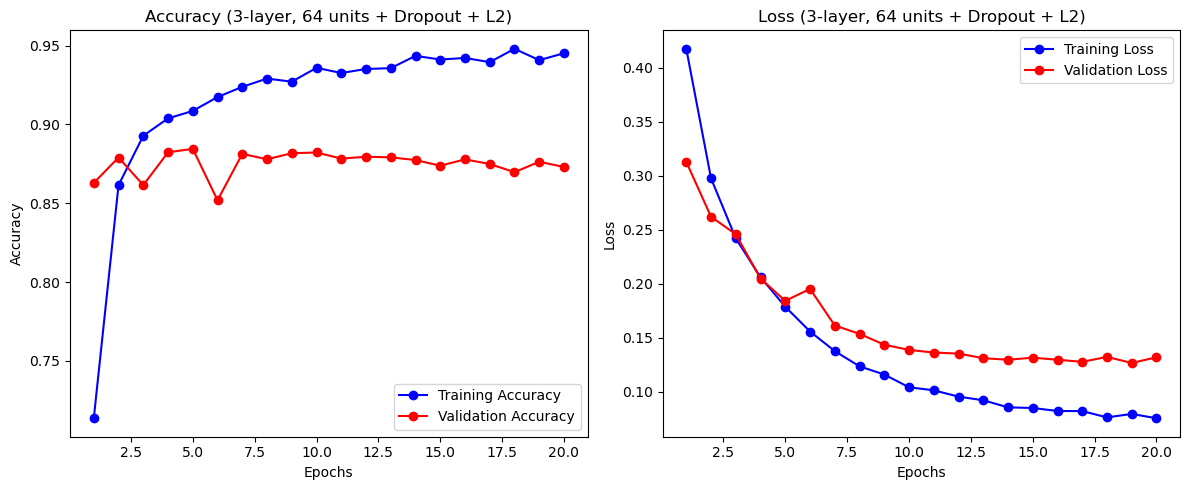

In [189]:
import matplotlib.pyplot as plt

# Extract history
acc = history_reg.history['accuracy']
val_acc = history_reg.history['val_accuracy']
loss = history_reg.history['loss']
val_loss = history_reg.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Accuracy (3-layer, 64 units + Dropout + L2)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Loss (3-layer, 64 units + Dropout + L2)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Model 8: 3 Hidden Layers(64 units)-Baseline vs Regularized Model

In [191]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import numpy as np
import tensorflow as tf
import random

# Set seed values for reproducibility
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

# Load the dataset
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=10000)

# Vectorize the sequences
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# Split the data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# ------------------------------------------------------------
# Baseline model without dropout or L2 regularization
# ------------------------------------------------------------
model_baseline = keras.Sequential([
    layers.Dense(64, activation='tanh', input_shape=(x_train.shape[1],)),
    layers.Dense(64, activation='tanh'),
    layers.Dense(64, activation='tanh'),
    layers.Dense(1, activation='sigmoid')
])

model_baseline.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

history_baseline = model_baseline.fit(
    partial_x_train, partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
    verbose=2
)

# ------------------------------------------------------------
# Model with Dropout and L2 Regularization
# ------------------------------------------------------------
model_reg = keras.Sequential([
    layers.Dense(64, activation='tanh', kernel_regularizer=regularizers.l2(0.001), input_shape=(x_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='tanh', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='tanh', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model_reg.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

history_reg = model_reg.fit(
    partial_x_train, partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
    verbose=2
)

# ------------------------------------------------------------
# Evaluate both models on the test set
# ------------------------------------------------------------
results_baseline = model_baseline.evaluate(x_test, y_test, verbose=0)
results_reg = model_reg.evaluate(x_test, y_test, verbose=0)

# Get final validation accuracy from training history
val_acc_baseline = history_baseline.history['val_accuracy'][-1]
val_acc_reg = history_reg.history['val_accuracy'][-1]

# ------------------------------------------------------------
# Print Results
# ------------------------------------------------------------
print("\n====================== RESULTS ======================")
print(f"Baseline Model Test Accuracy:     {results_baseline[1]:.4f}")
print(f"Baseline Model Validation Accuracy: {val_acc_baseline:.4f}")
print("------------------------------------------------------")
print(f"Regularized Model Test Accuracy:  {results_reg[1]:.4f}")
print(f"Regularized Model Validation Accuracy: {val_acc_reg:.4f}")
print("======================================================")


Epoch 1/20
30/30 - 5s - 161ms/step - accuracy: 0.7614 - loss: 0.1666 - val_accuracy: 0.8681 - val_loss: 0.0969
Epoch 2/20
30/30 - 1s - 29ms/step - accuracy: 0.8774 - loss: 0.0910 - val_accuracy: 0.8803 - val_loss: 0.0867
Epoch 3/20
30/30 - 1s - 33ms/step - accuracy: 0.9036 - loss: 0.0708 - val_accuracy: 0.8708 - val_loss: 0.0951
Epoch 4/20
30/30 - 1s - 33ms/step - accuracy: 0.9232 - loss: 0.0585 - val_accuracy: 0.8836 - val_loss: 0.0851
Epoch 5/20
30/30 - 1s - 35ms/step - accuracy: 0.9334 - loss: 0.0507 - val_accuracy: 0.8854 - val_loss: 0.0861
Epoch 6/20
30/30 - 1s - 35ms/step - accuracy: 0.9439 - loss: 0.0436 - val_accuracy: 0.8829 - val_loss: 0.0892
Epoch 7/20
30/30 - 1s - 46ms/step - accuracy: 0.9500 - loss: 0.0392 - val_accuracy: 0.8793 - val_loss: 0.0931
Epoch 8/20
30/30 - 1s - 34ms/step - accuracy: 0.9652 - loss: 0.0299 - val_accuracy: 0.8788 - val_loss: 0.0963
Epoch 9/20
30/30 - 1s - 33ms/step - accuracy: 0.9607 - loss: 0.0321 - val_accuracy: 0.8774 - val_loss: 0.0974
Epoch 10/

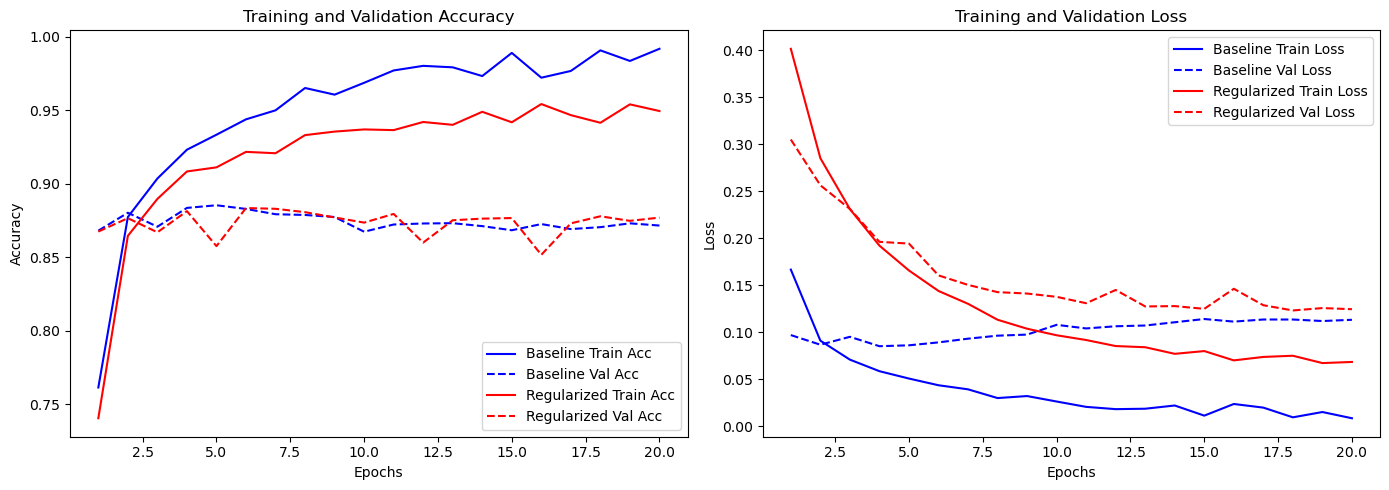

In [130]:
import matplotlib.pyplot as plt

epochs = range(1, 21)  # since you trained for 20 epochs

# Accuracy plots
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, history_baseline.history['accuracy'], 'b-', label='Baseline Train Acc')
plt.plot(epochs, history_baseline.history['val_accuracy'], 'b--', label='Baseline Val Acc')
plt.plot(epochs, history_reg.history['accuracy'], 'r-', label='Regularized Train Acc')
plt.plot(epochs, history_reg.history['val_accuracy'], 'r--', label='Regularized Val Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plots
plt.subplot(1, 2, 2)
plt.plot(epochs, history_baseline.history['loss'], 'b-', label='Baseline Train Loss')
plt.plot(epochs, history_baseline.history['val_loss'], 'b--', label='Baseline Val Loss')
plt.plot(epochs, history_reg.history['loss'], 'r-', label='Regularized Train Loss')
plt.plot(epochs, history_reg.history['val_loss'], 'r--', label='Regularized Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


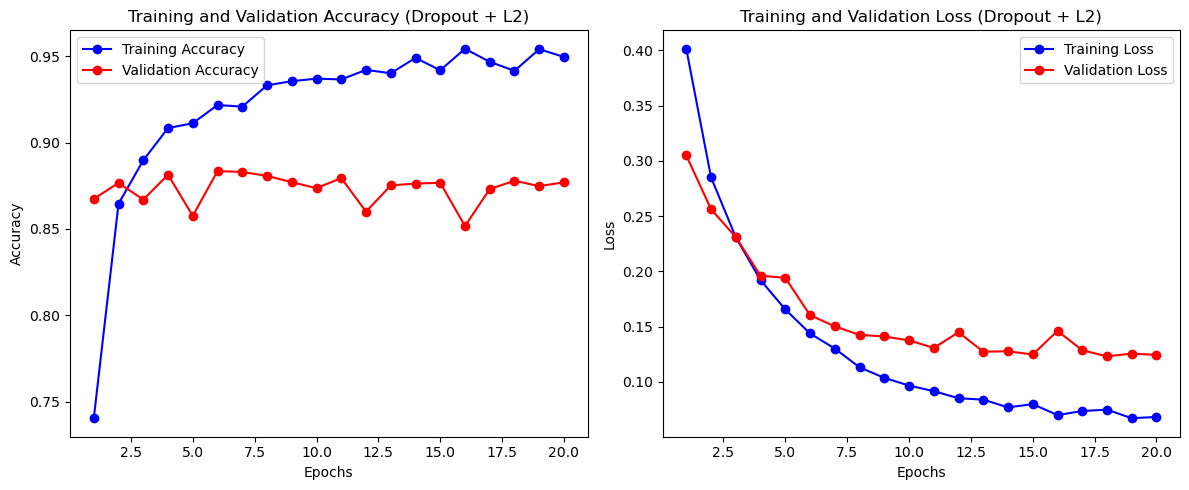

In [131]:
import matplotlib.pyplot as plt

# Extract training history
acc = history_reg.history['accuracy']
val_acc = history_reg.history['val_accuracy']
loss = history_reg.history['loss']
val_loss = history_reg.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy (Dropout + L2)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss (Dropout + L2)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Model 9 : 3 Hidden Layers(16,32,64 units) 

In [192]:
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import tensorflow as tf
import random

# Set seed values for reproducibility
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)


# 1. Split the data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# 2. Define the model with 3 hidden layers, each having different units
model_diff_units = keras.Sequential([
    layers.Dense(16, activation="tanh", input_shape=(x_train.shape[1],)),
    layers.Dense(32, activation="tanh"),
    layers.Dense(64, activation="tanh"),
    layers.Dense(1, activation="sigmoid")  # Output layer for binary classification
])

# 3. Compile the model
model_diff_units.compile(optimizer="rmsprop",
                        loss="mse",
                        metrics=["accuracy"])

# 4. Train the model
history = model_diff_units.fit(partial_x_train,
                              partial_y_train,
                              epochs=20,
                              batch_size=512,
                              validation_data=(x_val, y_val))

# 5. Evaluate the model
results_test = model_diff_units.evaluate(x_test, y_test)
results_val = model_diff_units.evaluate(x_val, y_val)

# 6. Print results
print("Test Results (3-layer with 16, 32, 64 units):", results_test)
print("Validation Results (3-layer with 16, 32, 64 units):", results_val)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.7673 - loss: 0.1619 - val_accuracy: 0.8677 - val_loss: 0.0996
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8906 - loss: 0.0827 - val_accuracy: 0.8830 - val_loss: 0.0843
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9133 - loss: 0.0643 - val_accuracy: 0.8761 - val_loss: 0.0896
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9347 - loss: 0.0506 - val_accuracy: 0.8840 - val_loss: 0.0863
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9505 - loss: 0.0398 - val_accuracy: 0.8807 - val_loss: 0.0919
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9517 - loss: 0.0376 - val_accuracy: 0.8803 - val_loss: 0.0928
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9587 - loss: 0.0339 - val_accuracy: 0.8790 - val_loss: 0.0949
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9746 - loss: 0.0228 - val_accuracy: 0.8647 - v

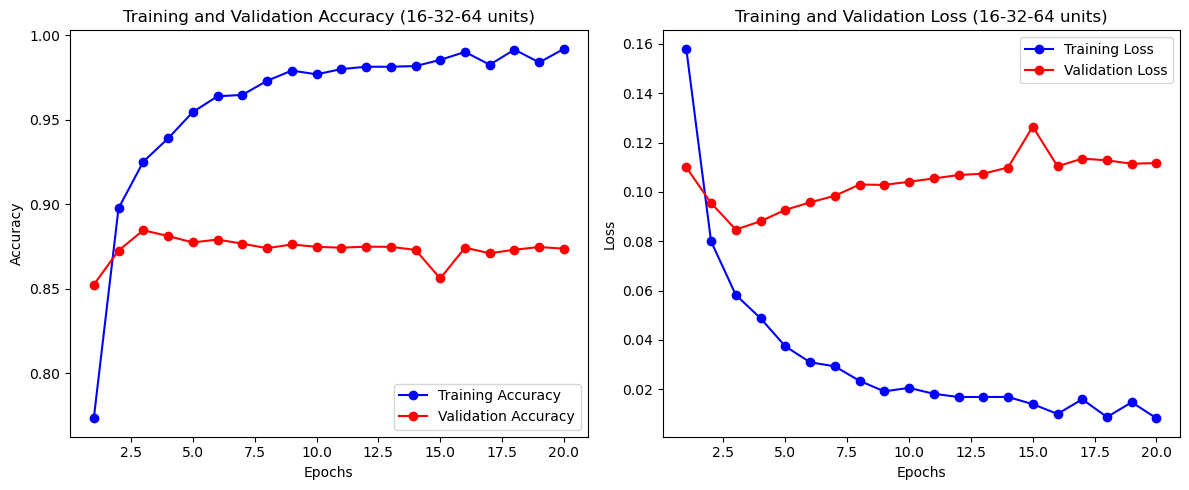

In [89]:
import matplotlib.pyplot as plt

# Extract training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy (16-32-64 units)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss (16-32-64 units)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Model 10 : 3 Hidden Layers(16,32,64 units) with Regularization

In [193]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers


import numpy as np
import tensorflow as tf
import random

# Set seed values for reproducibility
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)


# 1. Split the data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# 2. Define the model with 3 hidden layers of different units, with dropout and L2 regularization
model_reg = keras.Sequential([
    layers.Dense(16, activation='tanh',
                 kernel_regularizer=regularizers.l2(0.001),
                 input_shape=(x_train.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(32, activation='tanh',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='tanh',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# 3. Compile the model with mse loss and rmsprop optimizer
model_reg.compile(optimizer='rmsprop',
                  loss='mse',
                  metrics=['accuracy'])

# 4. Train the model with validation data
history = model_reg.fit(partial_x_train,
                        partial_y_train,
                        epochs=20,
                        batch_size=512,
                        validation_data=(x_val, y_val))

# 5. Evaluate on test and validation data
results_test = model_reg.evaluate(x_test, y_test)
results_val = model_reg.evaluate(x_val, y_val)

# 6. Print results
print("Test Results (3-layer with 16,32,64 units + dropout + L2):", results_test)
print("Validation Results (3-layer with 16,32,64 units + dropout + L2):", results_val)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.7111 - loss: 0.2806 - val_accuracy: 0.8608 - val_loss: 0.1964
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8621 - loss: 0.1894 - val_accuracy: 0.8454 - val_loss: 0.1914
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8943 - loss: 0.1566 - val_accuracy: 0.8834 - val_loss: 0.1549
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9130 - loss: 0.1342 - val_accuracy: 0.8811 - val_loss: 0.1492
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9197 - loss: 0.1208 - val_accuracy: 0.8811 - val_loss: 0.1418
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9299 - loss: 0.1085 - val_accuracy: 0.8831 - val_loss: 0.1358
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9370 - loss: 0.0978 - val_accuracy: 0.8810 - val_loss: 0.1327
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9387 - loss: 0.0924 - val_accuracy: 0.8823 - v

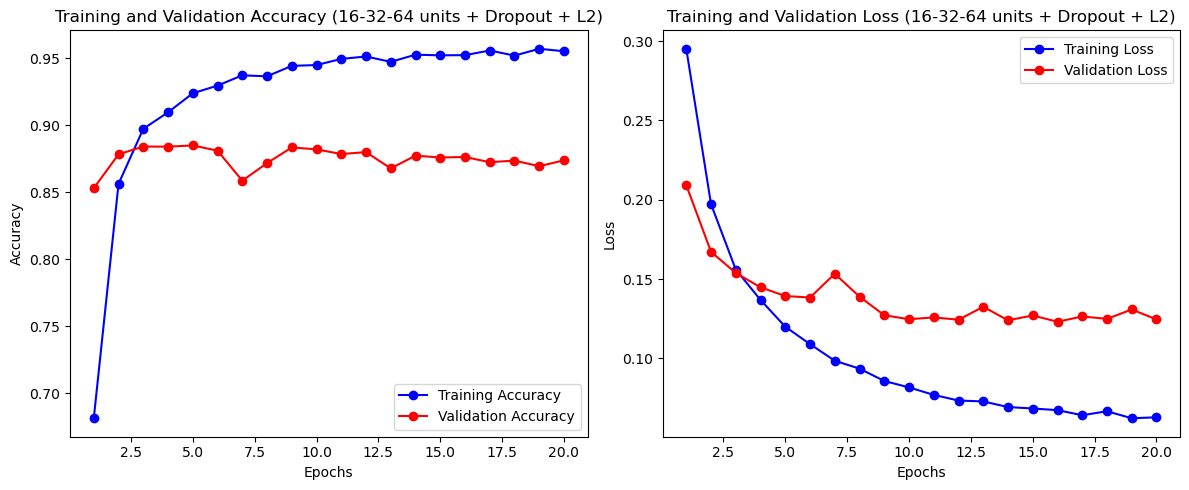

In [91]:
import matplotlib.pyplot as plt

# Extract metrics from training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy (16-32-64 units + Dropout + L2)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss (16-32-64 units + Dropout + L2)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Model 11 : 1 Hidden Layer with relu and binary_crossentropy

In [158]:
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import tensorflow as tf
import random

# Set seed values for reproducibility
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

# Load the dataset
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=10000)

# Vectorize the sequences
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.0
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# 1. Split the data into training and validation sets
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# 2. Define the model (1 hidden layer with 16 units and ReLU activation)
model_1layer_16units = keras.Sequential([
    layers.Dense(16, activation="relu", input_shape=(x_train.shape[1],)),
    layers.Dense(1, activation="sigmoid")
])

# 3. Compile the model with Binary Crossentropy loss and RMSprop optimizer
model_1layer_16units.compile(optimizer="rmsprop",
                             loss="binary_crossentropy",
                             metrics=["accuracy"])

# 4. Train the model with validation data
history_1layer = model_1layer_16units.fit(partial_x_train,
                                          partial_y_train,
                                          epochs=20,
                                          batch_size=512,
                                          validation_data=(x_val, y_val))

# 5. Evaluate on test data
results_test = model_1layer_16units.evaluate(x_test, y_test)

# 6. Evaluate on validation data
results_val = model_1layer_16units.evaluate(x_val, y_val)

# 7. Print results
print("Test Results: (1-layer, 16 units, ReLU + binary_crossentropy)", results_test)
print("Validation Results: (1-layer, 16 units, ReLU + binary_crossentropy)", results_val)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.7971 - loss: 0.5104 - val_accuracy: 0.8604 - val_loss: 0.4065
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8925 - loss: 0.3416 - val_accuracy: 0.8795 - val_loss: 0.3359
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9131 - loss: 0.2721 - val_accuracy: 0.8849 - val_loss: 0.3035
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9271 - loss: 0.2293 - val_accuracy: 0.8875 - val_loss: 0.2873
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9370 - loss: 0.1997 - val_accuracy: 0.8877 - val_loss: 0.2794
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9441 - loss: 0.1776 - val_accuracy: 0.8874 - val_loss: 0.2772
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9503 - loss: 0.1598 - val_accuracy: 0.8855 - val_loss: 0.2779
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9563 - loss: 0.1447 - val_accuracy: 0.8842 - v

# Model 12 :2 Hidden Layers(16 each with relu and binary_crossntropy) 

In [200]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import tensorflow as tf
import random

# Set seed values for reproducibility
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

# Assuming x_train, y_train, x_test, y_test already prepared via vectorize_sequences

# Split into training and validation sets
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Define model with TWO hidden layers
model_2layer_16units = keras.Sequential([
    layers.Dense(16, activation="relu", input_shape=(x_train.shape[1],)),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])




# Compile the model
model_2layer_16units.compile(optimizer="rmsprop",
                             loss="binary_crossentropy",
                             metrics=["accuracy"])

# Train the model
history_2layer = model_2layer_16units.fit(partial_x_train,
                                          partial_y_train,
                                          epochs=20,
                                          batch_size=512,
                                          validation_data=(x_val, y_val))

# Evaluate on test data
results_test_2layer = model_2layer_16units.evaluate(x_test, y_test)

# Evaluate on validation data
results_val_2layer = model_2layer_16units.evaluate(x_val, y_val)

print("Test Results (2 hidden layers, 16 units each,ReLU + binary_crossentropy):", results_test_2layer)
print("Validation Results (2 hidden layers, 16 units each,ReLU + binary_crossentropy):", results_val_2layer)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.7762 - loss: 0.5288 - val_accuracy: 0.8646 - val_loss: 0.3964
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8901 - loss: 0.3252 - val_accuracy: 0.8843 - val_loss: 0.3092
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9209 - loss: 0.2385 - val_accuracy: 0.8825 - val_loss: 0.2947
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9347 - loss: 0.1967 - val_accuracy: 0.8877 - val_loss: 0.2767
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9442 - loss: 0.1659 - val_accuracy: 0.8856 - val_loss: 0.2789
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9549 - loss: 0.1402 - val_accuracy: 0.8848 - val_loss: 0.2874
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9628 - loss: 0.1208 - val_accuracy: 0.8839 - val_loss: 0.2968
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9698 - loss: 0.1022 - val_accuracy: 0.8815 - v

# Model 13 :3 Hidden Layers(16 each with relu and binary_crossntropy) 

In [156]:
# Define model with THREE hidden layers
model_3layer_16units = keras.Sequential([
    layers.Dense(16, activation="relu", input_shape=(x_train.shape[1],)),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3layer_16units.compile(optimizer="rmsprop",
                             loss="binary_crossentropy",
                             metrics=["accuracy"])

# Train the model
history_3layer = model_3layer_16units.fit(partial_x_train,
                                          partial_y_train,
                                          epochs=20,
                                          batch_size=512,
                                          validation_data=(x_val, y_val))

# Evaluate on test data
results_test_3layer = model_3layer_16units.evaluate(x_test, y_test)

# Evaluate on validation data
results_val_3layer = model_3layer_16units.evaluate(x_val, y_val)

print("Test Results (3 hidden layers, 16 units each,ReLU + binary_crossentropy):", results_test_3layer)
print("Validation Results (3 hidden layers, 16 units each,ReLU + binary_crossentropy):", results_val_3layer)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.7639 - loss: 0.5444 - val_accuracy: 0.8608 - val_loss: 0.3994
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8895 - loss: 0.3207 - val_accuracy: 0.8854 - val_loss: 0.3063
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9191 - loss: 0.2281 - val_accuracy: 0.8866 - val_loss: 0.2828
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9337 - loss: 0.1819 - val_accuracy: 0.8862 - val_loss: 0.2823
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9506 - loss: 0.1480 - val_accuracy: 0.8843 - val_loss: 0.2911
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9622 - loss: 0.1190 - val_accuracy: 0.8839 - val_loss: 0.3065
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9698 - loss: 0.0976 - val_accuracy: 0.8817 - val_loss: 0.3258
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9747 - loss: 0.0815 - val_accuracy: 0.8797 - v

In [207]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_test = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8046 - loss: 0.5222
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8910 - loss: 0.3167
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9124 - loss: 0.2422 
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9274 - loss: 0.2037 
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8876 - loss: 0.2819


In [208]:
results_test

[0.2818867266178131, 0.8876399993896484]

In [209]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results_val = model.evaluate(x_val, y_val)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9372 - loss: 0.1784 
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9454 - loss: 0.1591
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9513 - loss: 0.1437
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9556 - loss: 0.1314 
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9679 - loss: 0.1085


In [210]:
results_val

[0.10850107669830322, 0.9678999781608582]